In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
# calling the data set from the home page
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


from the above data set the observations are as follows 

*Survived -  0- passenger had not survived and 1- passenger had survived 

*PClass Column indicate the ticket class the passenger were holding ,that means 1= 1st class(Upper class) 2= 2nd class(Middle Class) 3=3rd class (Lower class) 

*Embarked column indicated the passenger embarketion port S = Sounthampton C= Cherbourg Q= Queenstown

*SibSp column indicates family relations
siblings = brother,sister,stepbrother, step sister
Spous = husband,wife

*Parch column indicates the Family relations
Parents= father,mother
child= son, daughter, stepson,stepdaughter
some children travelled only with nanny so parch=0 for them 

*Cabin column indicates cabin number of the passenger 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
459,460,0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q


# EDA

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

From above we can see that from 12 columns there are 5 columns contain object type data set, 2 columns contain float type data set and remaining column has integer type dataset 

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

By checking null values we can observe that there are 3 columns contain null values in that cabin column contain highest number of null values and Embarked column contain lowest number of null values 

In [8]:
# The name and ticket column is not collinier with the targeted column this reason we have to drop that column
# The cabin column contain more than 70% of null values so it is better to drop the cabin column also to improve the score of the model

df1=df.drop(['Name','Ticket','Cabin'],axis=1)
df1

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [9]:
# replacing the  null values in the age column with mean value
df1['Age'].fillna(df1['Age'].mean(),inplace=True)
df1



,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [10]:
# finding mode value of 'Embark' column
print(df1['Embarked'].mode())

0    S
Name: Embarked, dtype: object


 as the Embarked column contain catagorical data, the most repeated value is 's' this mean most of the passenger of the ship Embakred from the Sounthampton port 

In [11]:
print(df1['Embarked'].mode()[0])

S


In [12]:
# replacing missing value of Embarked column with 's' by using mode function 
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)
df1

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [13]:
# checking null values 
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

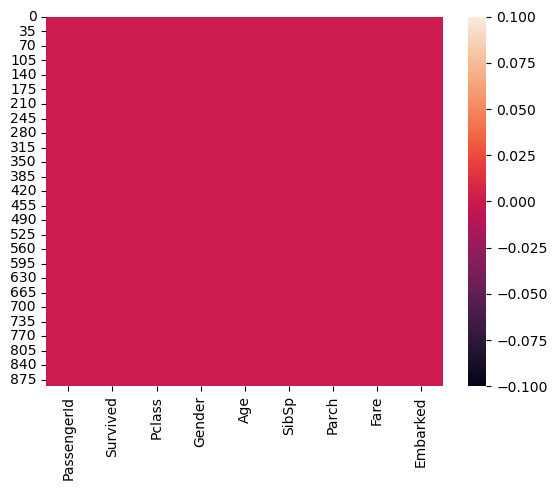

In [14]:
sns.heatmap(df1.isnull())

In [15]:
df1

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


# Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

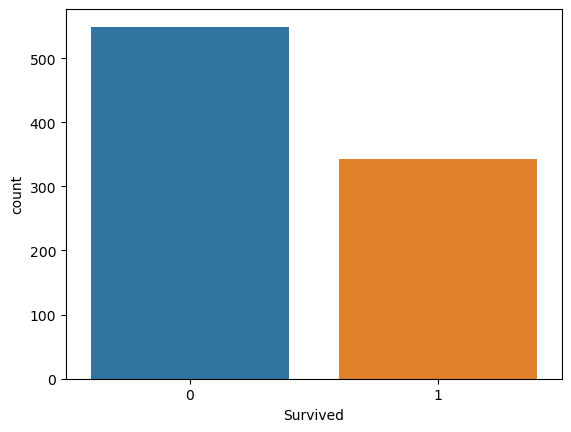

In [16]:
# number of people survived and not survived 
sns.countplot(df1['Survived'])

In [17]:
df1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

from above we can say that 342 passenger out of 891 had survived the accident 

<AxesSubplot:xlabel='Gender', ylabel='count'>

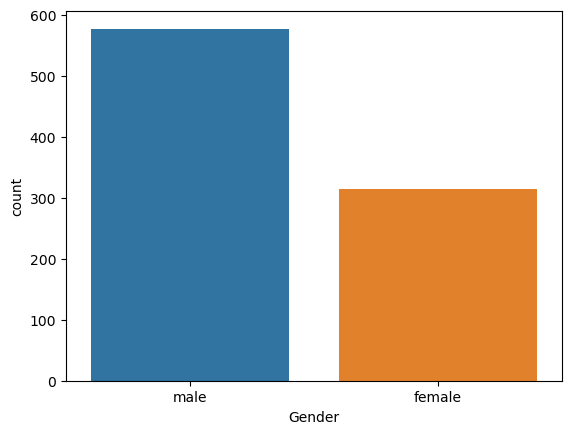

In [18]:
# finding the passenger gender 
sns.countplot(df1['Gender'])

In [19]:
df1['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

the above data shows that out of 891 passengers 314 - female and 577 - male 

<AxesSubplot:xlabel='Gender', ylabel='count'>

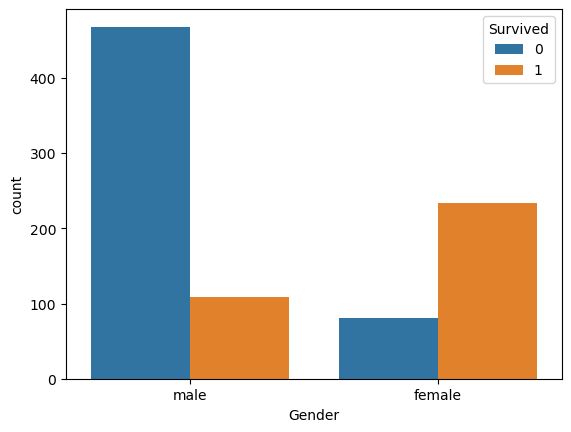

In [20]:
# compare survivel number on the based on Gender
sns.countplot('Gender',hue='Survived',data= df1)

In [21]:
pd.crosstab(df1['Survived'],df1['Gender'],margins=True,margins_name='Total')

Gender,female,male,Total
Survived,,,
0,81,468,549
1,233,109,342
Total,314,577,891


from above graph

0 -represent death
1- repressent survived 
 
so we can say that though the number of female passenger is less than male passenger
the survival rate of female passenger is more than male passenger 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

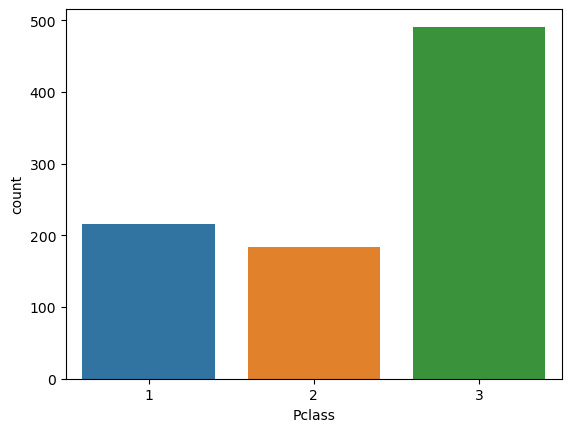

In [22]:
# finding the passenger by the class
sns.countplot(df1['Pclass'])

In [23]:
df1['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

from above data we can say that 
half of the passenger holding a ticket of lower class 
and the number of 1st class passenger is more than the number of 2nd class passenger 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

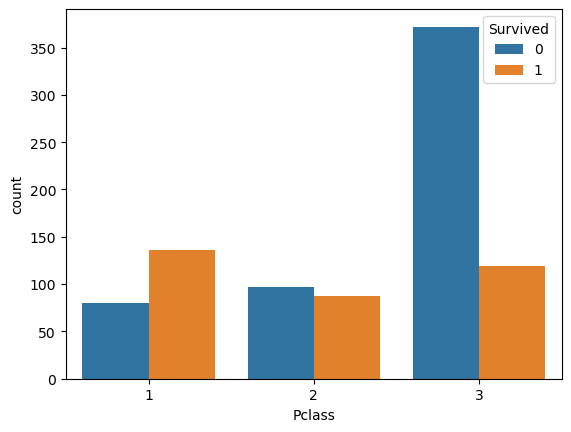

In [24]:
# survival rate of passenger according to their class 
sns.countplot('Pclass',hue='Survived', data=df1)

In [25]:
pd.crosstab(df1['Survived'],df1['Pclass'],margins=True,margins_name='Total')

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
Total,216,184,491,891


from above graph we can find that
more passenger from lower class had not survived the accident 
on the other hand only few passenger from 1st class had lost their life in the accident 
the death and survived number of class 2nd has only 10 passenger difference

<AxesSubplot:xlabel='Embarked', ylabel='count'>

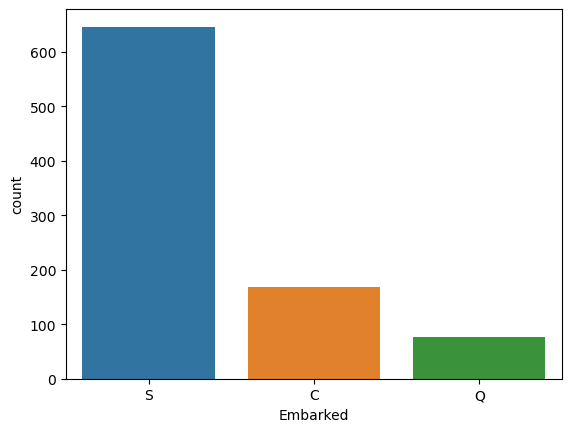

In [26]:
# finding passenger according to their "Embarked" station 
sns.countplot(df1['Embarked'])

In [27]:
df1['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

from above data set we find that 
more that 70% of passengers had borded on ship from Southampton port 
while only 77 passengers had borded on the sheep from Queenstown   

<AxesSubplot:xlabel='Embarked', ylabel='count'>

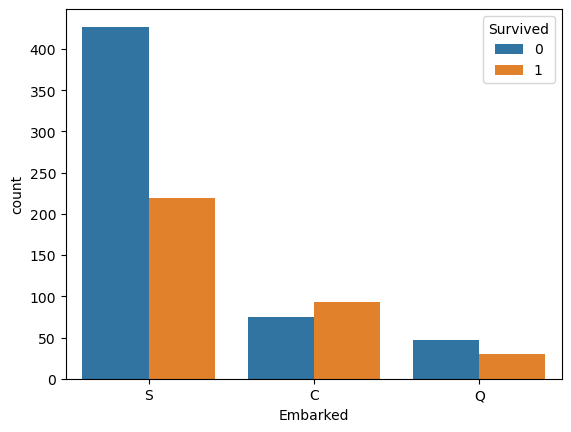

In [28]:
# Survival rate of the passenger according to their 'Embarekd' station
sns.countplot('Embarked',hue='Survived',data=df1)


In [29]:
pd.crosstab(df1['Survived'],df1['Embarked'],margins=True,margins_name='Total')

Embarked,C,Q,S,Total
Survived,,,,
0,75,47,427,549
1,93,30,219,342
Total,168,77,646,891


more deaths registed of passenger who had onbord the ship from Southampton port 
only few passenger survived the accident who had onborded the ship from Queenstown


# Statistical Summry

In [30]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
in the above data set 
the mean is greater than median in fare column so it seems the data is little bit skwed there 
also there is huge difference between 75% and max in fare column so there is chances of outliers


SyntaxError: invalid syntax (3647640725.py, line 1)

# Data preparation for model

In [32]:
# the data of column gender and Embarked are in object type we have to convert it into int for machine training 
from sklearn.preprocessing import LabelEncoder

In [33]:
# making instance for encoder
le=LabelEncoder()

# converting the columns
df1['Gender']=le.fit_transform(df1['Gender'])

df1['Embarked']=le.fit_transform(df1['Embarked'])

In [34]:
df1

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [35]:
# in the above data set we can see that the passengerid column does not has any correlation with the taregeted column 
df1.drop('PassengerId',axis=1)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [36]:
# Spliting up the data set 
x=df1.iloc[:,2:]
y=df1.iloc[:,1]

In [37]:
x

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [38]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [39]:
# Scaling up the data set for the model 
from sklearn.preprocessing import StandardScaler

In [40]:
st=StandardScaler()

x=st.fit_transform(x)



In [41]:
x.shape

(891, 7)

In [42]:
y.shape

(891,)

In [43]:
# training and testing of the dataset 
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [45]:
x_train.shape

(712, 7)

In [46]:
x_test.shape

(179, 7)

In [47]:
y_train.shape

(712,)

In [48]:
y_test.shape

(179,)

# Model Training 

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

LogisticRegression

In [50]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

In [51]:
# making isntance fro logistic regression
lg=LogisticRegression()

# fiting up the traing part 
lg.fit(x_train,y_train)

# checking the score of trained data
lg.score(x_train,y_train)

0.8019662921348315

In [52]:
#preparing for test prediction 
pred_test=lg.predict(x_test)

# checking the score and metrics

print('Accuracy score :',accuracy_score(y_test,pred_test))

print('Classification Reprot :',classification_report(y_test,pred_test))

print('Confusion Matrix :',confusion_matrix(y_test,pred_test))


Accuracy score : 0.8100558659217877
Classification Reprot :               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix : [[90 15]
 [19 55]]


In [53]:
# checking up cross_val score 
from sklearn.model_selection import cross_val_score

In [54]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy_score and score.mean:',accuracy_score(y_test,pred_test)-score.mean())

[0.77653631 0.78651685 0.78089888 0.76404494 0.81460674]
0.7845207457158998
0.016764719881414474
difference between accuracy_score and score.mean: 0.025535120205887885


Random forest classifier 

In [55]:
# calling random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [56]:
# creating instance for RandomForest Classifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)

#fitting up training part 
rf.fit(x_train,y_train)

# creating prediction of the test
rf_pred=rf.predict(x_test)

# Checking scores and matrix
print(accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

[[92 13]
 [20 54]]


In [57]:
rf.score(x_train,y_train)

0.9803370786516854

In [58]:
# checking cross_val_score
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy_score and score.mean:',accuracy_score(y_test,pred_test)-score.mean())

[0.79329609 0.82022472 0.84831461 0.7752809  0.83146067]
0.8137153976523759
0.026262255119529686
difference between accuracy_score and score.mean: -0.0036595317305881947


Decision Tree Classifier

In [59]:
# calling decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [60]:
# creating instance for dtc
dtc=DecisionTreeClassifier()

#fitting up the model
dtc.fit(x_train,y_train)

# checking dtc score
dtc.score(x_train,y_train)

#making prediction of the test
pred_dtc=dtc.predict(x_test)

#checking matrics
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.7932960893854749
[[86 19]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [61]:
# checking dtc score
dtc.score(x_train,y_train)

0.9803370786516854

In [62]:
#checking cross val score
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print('difference between accuracy_score and score.mean:',accuracy_score(y_test,pred_dtc)-score.mean())

[0.7150838  0.7752809  0.78651685 0.74157303 0.79775281]
0.7632414788776599
difference between accuracy_score and score.mean: 0.030054610507814994


Support vector Classifier

In [63]:
# calling of support vector classifier
from sklearn.svm import SVC

In [64]:
# created instance for svc
sv=SVC()

#fittingup model
sv.fit(x_train,y_train)

#checking the score 
sv.score(x_train,y_train)

#creat prediction
pred_sv=sv.predict(x_test)

# checking out the metrics
print(accuracy_score(y_test,pred_sv))
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

0.8156424581005587
[[93 12]
 [21 53]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [65]:
#checking the score 
sv.score(x_train,y_train)

0.8455056179775281

In [66]:
# checking cross val score
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())
print('difference between accuracy_score and score.mean:',accuracy_score(y_test,pred_dtc)-score.mean())

[0.83240223 0.82022472 0.81460674 0.80337079 0.86516854]
0.827154604230745
difference between accuracy_score and score.mean: -0.03385851484527014


# Hyper Parameter tuning 

As we can seen from above training of the model with different classification 
the random forest classifier has highest accuracy score and has lowest difference between accuracy score to cross_validation score 
there for we can choose Random forest classifier for the Hyper parameter tuning 

In [67]:
# number of trees in random forest
n_estimators=[50,100,150,200]

#Number of feature to consider at every split 
max_features=[0.2,0.6,1.0]

#maximum number of levels in trees
max_depth=[2,8,None]

#number of samples
max_samples=[0.5,0.75,1.0]


In [68]:
param_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'max_samples':max_samples}

print(param_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [69]:
rf=RandomForestClassifier()

In [70]:
from sklearn.model_selection import GridSearchCV


In [71]:
rf_grid=GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,verbose=2, n_jobs=-1)

In [72]:
# training the model on the basis of GridsearchCV
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [73]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}

In [74]:
rf_grid.best_score_

0.8314488328572835

In [75]:
# Applying suggested paramters of randomforest classifier to training the model 
rf1=RandomForestClassifier(n_estimators=100, max_depth=8,max_features=0.6, max_samples=1.0)

#training the model 
rf1.fit(x_train,y_train)


#checking the score
rf1.score(x_train,y_train)

0.9185393258426966

In [76]:
# creating prediction of the test
rf1_pred=rf1.predict(x_test)

# Checking scores and matrix
print(accuracy_score(y_test,rf1_pred))
print(classification_report(y_test,rf1_pred))
print(confusion_matrix(y_test,rf1_pred))


0.8212290502793296
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

[[95 10]
 [22 52]]


In [77]:
def survival(S):
    S=S.reshape(1,-1)
    rf1_pred=rf1.predict(S)
    print('predicted survival :',rf1_pred)
    if rf1_pred==1:
        print('the passenger had survived the accident')
    else:
        print('passenger had not survived the accident')
    
    

In [78]:
S=np.array([3,1,22.000000,1,0,7.2500,2])
survival(S)

predicted survival : [0]
passenger had not survived the accident


# Saving model

In [79]:
import pickle

In [80]:
filename='tintanic_survival.pkl'
pickle.dump(rf1,open(filename,'wb'))